## Kmeans Clustering Insurance Data

### Import Packages

In [1]:
##General Packages##
import pandas as pd
import numpy as np
import os as os
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

##Scikit Packages##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from sklearn.cluster import DBSCAN

### Import Dataset

In [2]:
insurance = pd.read_csv("C:/Users/Viswashanthi/Documents/Shanthi/Education/ML/Clustering-Insurance/insurance.csv")

In [3]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### Exploratory Data Analysis and Visualization

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


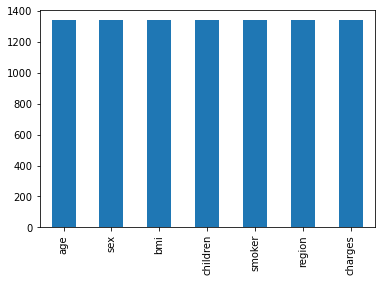

In [5]:
insurance.count().plot(kind='bar')
plt.show()

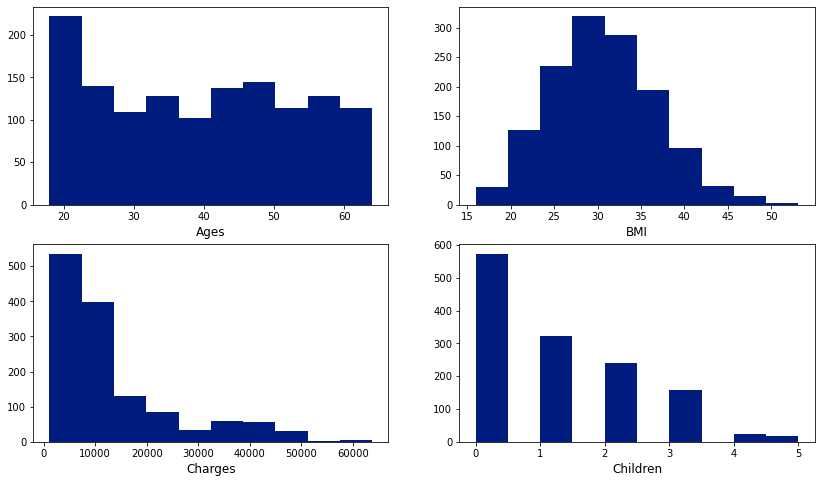

In [6]:
plt.figure(figsize=(14,8))
style.use("seaborn-dark-palette")
plt.subplot(2,2,1)
plt.hist(insurance["age"])
plt.xlabel("Ages", fontsize=12)
plt.subplot(2,2,2)
plt.hist(insurance["bmi"])
plt.xlabel("BMI", fontsize=12)
plt.subplot(2,2,3)
plt.hist(insurance["charges"])
plt.xlabel("Charges", fontsize=12)
plt.subplot(2,2,4)
plt.hist(insurance["children"])
plt.xlabel("Children", fontsize=12)
plt.show()

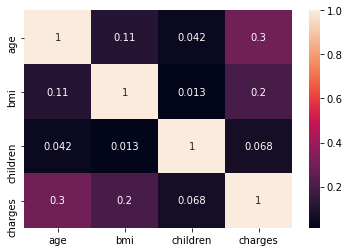

In [7]:
sns.heatmap(data =insurance.corr(),annot=True)
plt.show()

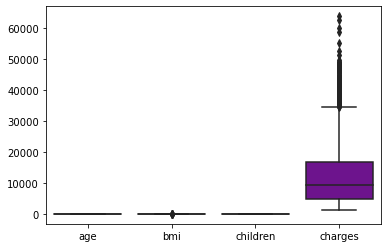

In [8]:
sns.boxplot(data=insurance[['age','bmi','children','charges']])
plt.show()

In [9]:
insurance["log_charges"]=np.log(insurance["charges"])
insurance.head(3) 

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.90,0,yes,southwest,16884.9240,9.734176
1,18,male,33.77,1,no,southeast,1725.5523,7.453302
2,28,male,33.00,3,no,southeast,4449.4620,8.400538


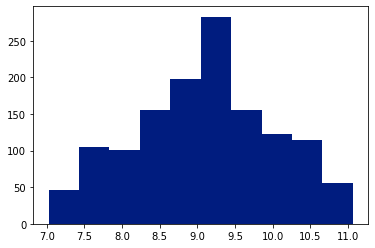

In [10]:
plt.hist(insurance["log_charges"])
plt.show()

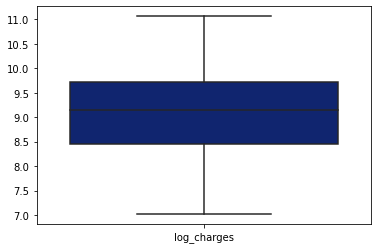

In [11]:
sns.boxplot(data=insurance[['log_charges']])
plt.show()

#### Age

In [12]:
# categorise age in bins Yound adult, adult and seniors
insurance.loc[(insurance.age>=insurance.age.min()) & (insurance.age<=30), "age_cat"]="Young Adult"
insurance.loc[(insurance.age>30) & (insurance.age<=59), "age_cat"]="Adult"
insurance.loc[(insurance.age>59), "age_cat"]="Seniors"
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges,log_charges,age_cat
0,19,female,27.90,0,yes,southwest,16884.9240,9.734176,Young Adult
1,18,male,33.77,1,no,southeast,1725.5523,7.453302,Young Adult
2,28,male,33.00,3,no,southeast,4449.4620,8.400538,Young Adult


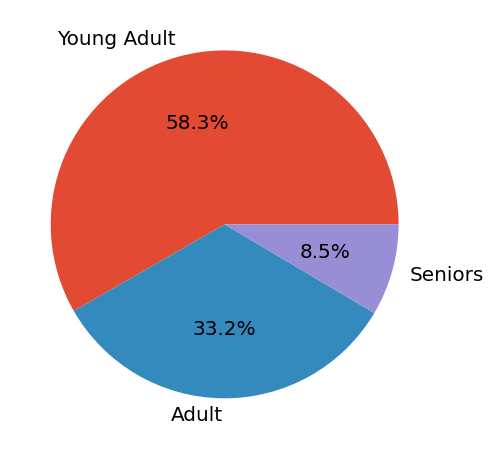

In [13]:
labels=insurance.age_cat.unique().tolist()
count=insurance.age_cat.value_counts()
count=count.values
style.use("ggplot")
plt.figure(figsize=(8,8))
explode=(0,0,0)
plt.pie(count, labels=labels,explode=explode, autopct="%1.1f%%", textprops={'fontsize': 20})
plt.show()

#### Relationship between Age and Charges

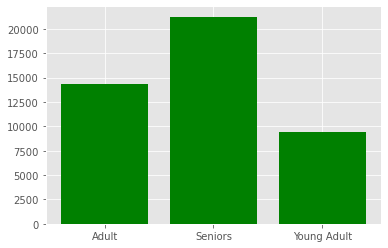

In [14]:
charge_avg_age=insurance.groupby("age_cat")["charges"].mean()
labels_avg=charge_avg_age.keys()
charge_avg_age=charge_avg_age.tolist()

plt.bar(labels_avg, charge_avg_age, color="green")
plt.show()

#### Relationship between Sex and Charges

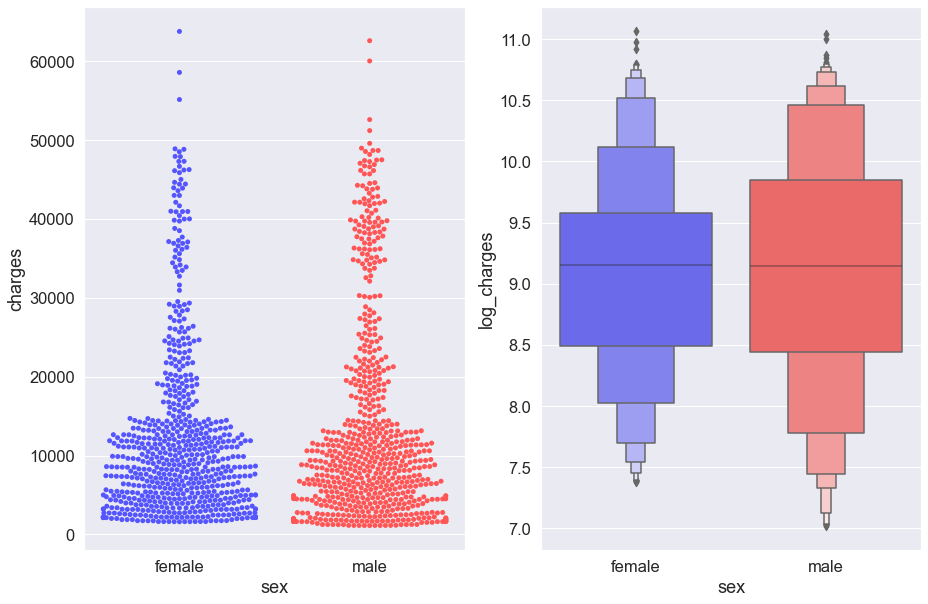

In [15]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.swarmplot(x=insurance["sex"], y=insurance["charges"], palette ="seismic")
plt.subplot(1,2,2)
sns.boxenplot(x=insurance["sex"], y=insurance["log_charges"], palette ="seismic")
plt.show()

In [16]:
insurance.drop(columns =['sex'],inplace=True)

#### Relationship between BMI and Charges

In [17]:
# categorise bmi into bins Under weight, Normal, Overweight and Obese.
insurance.loc[(insurance.bmi<19), "bmi_cat"]="Underweight"
insurance.loc[(insurance.bmi>=19) & (insurance.bmi<25), "bmi_cat"]="Normal"
insurance.loc[(insurance.bmi>=25) & (insurance.bmi<30), "bmi_cat"]="Overweight"
insurance.loc[(insurance.bmi>=30), "bmi_cat"]="Obese"
insurance.head(3)

,age,bmi,children,smoker,region,charges,log_charges,age_cat,bmi_cat
0,19,27.90,0,yes,southwest,16884.9240,9.734176,Young Adult,Overweight
1,18,33.77,1,no,southeast,1725.5523,7.453302,Young Adult,Obese
2,28,33.00,3,no,southeast,4449.4620,8.400538,Young Adult,Obese


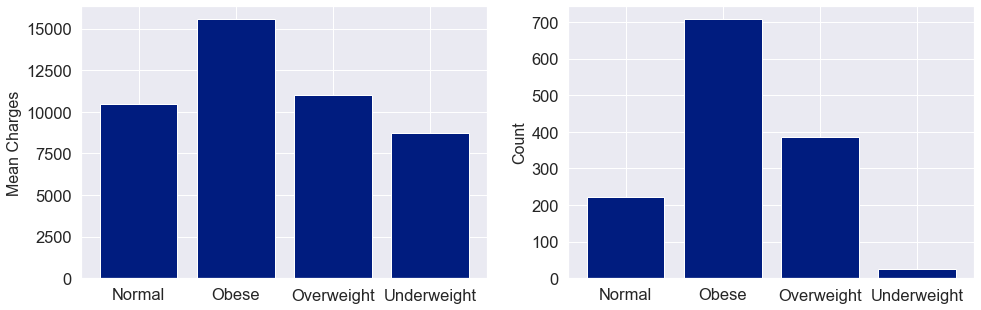

In [18]:
bmi_avg_charge=insurance.groupby("bmi_cat")["charges"].mean()
labels_mean=bmi_avg_charge.keys()
bmi_avg_charge=bmi_avg_charge.tolist()

bmi_count_charge=insurance.groupby("bmi_cat")["charges"].count()
labels_count=bmi_count_charge.keys()
bmi_count_charge=bmi_count_charge.tolist()

style.use("seaborn-dark-palette")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(labels_mean, bmi_avg_charge)
plt.ylabel("Mean Charges", fontsize=16)

plt.subplot(1,2,2)
plt.bar(labels_count, bmi_count_charge)
plt.ylabel("Count", fontsize=16)
plt.show()

#### Relationship between Smoker and Charges 

C:\Users\Viswashanthi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


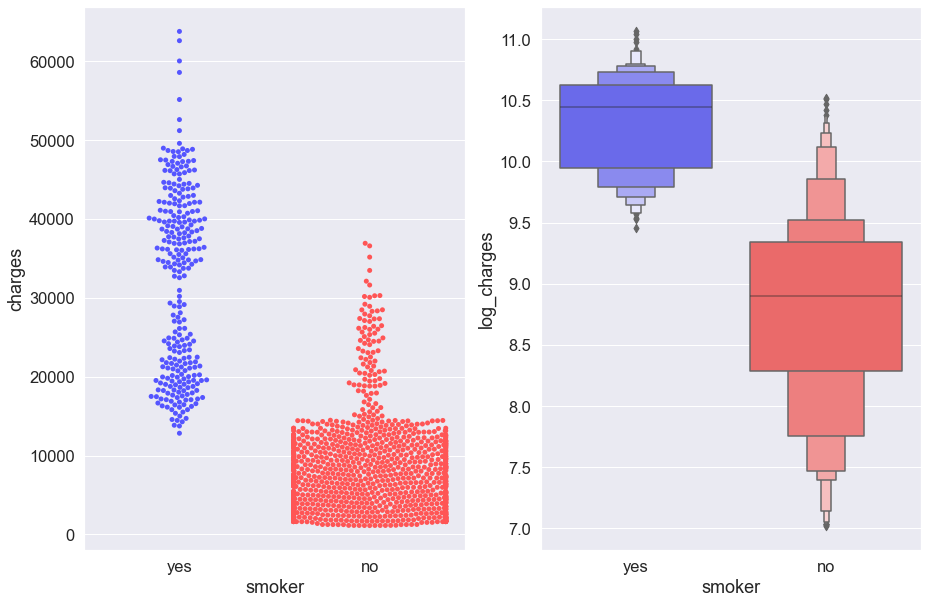

In [19]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.swarmplot(x=insurance["smoker"], y=insurance["charges"], palette ="seismic")
plt.subplot(1,2,2)
sns.boxenplot(x=insurance["smoker"], y=insurance["log_charges"], palette ="seismic")
plt.show()

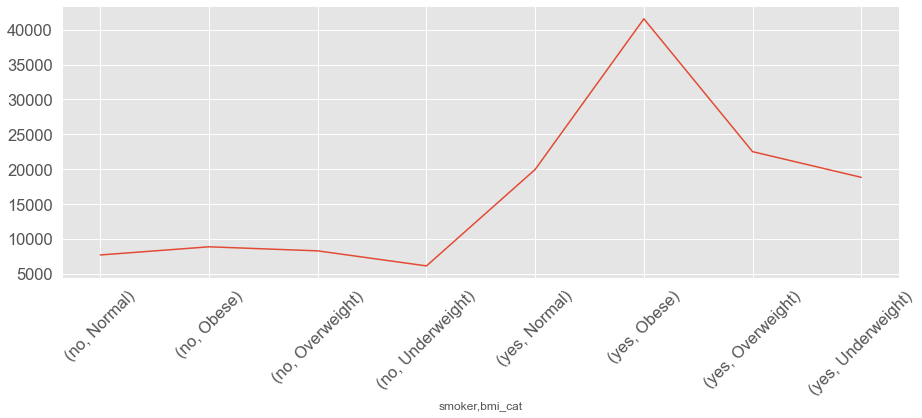

In [20]:
plt.figure(figsize=(15,5))
style.use("ggplot")
ax=plt.subplot(1,1,1)
insurance.groupby(["smoker", "bmi_cat"])["charges"].mean().plot(ax=ax)
ax.tick_params('x',labelrotation=45)

In [21]:
insurance=pd.get_dummies(insurance, columns=['smoker'], drop_first=True) #one hot encoding

#### Relationship between Children and Charges

C:\Users\Viswashanthi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Viswashanthi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Viswashanthi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


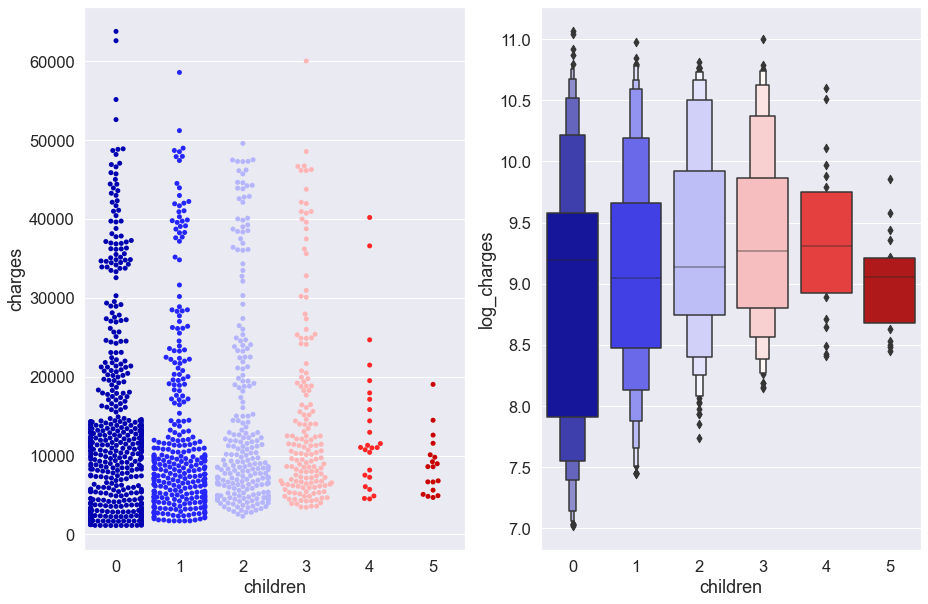

In [22]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.swarmplot(x=insurance["children"], y=insurance["charges"], palette ="seismic")
plt.subplot(1,2,2)
sns.boxenplot(x=insurance["children"], y=insurance["log_charges"], palette ="seismic")
plt.show()

In [23]:
insurance.drop(columns =['children'],inplace=True)

#### Relationship between Region and Charges

C:\Users\Viswashanthi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Viswashanthi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Viswashanthi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


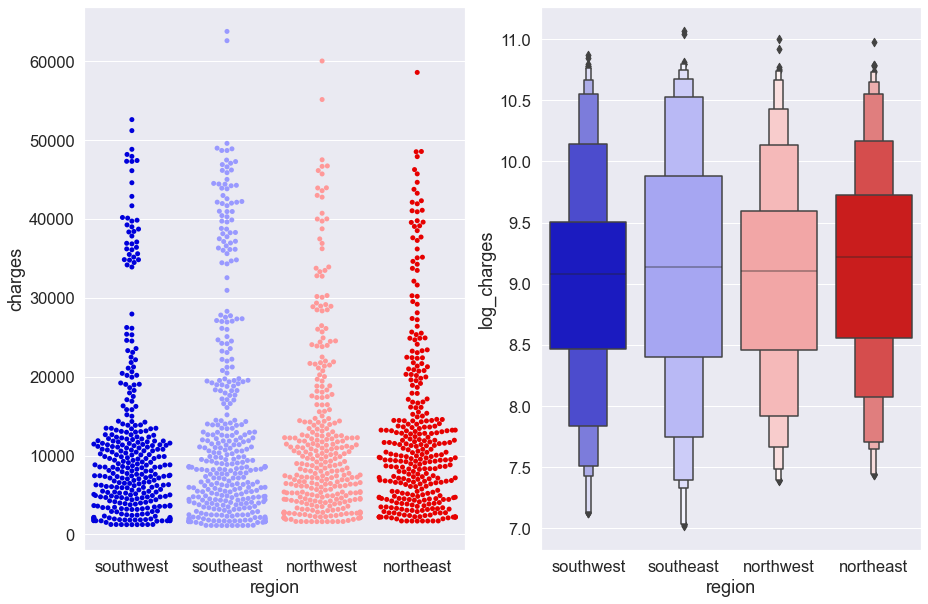

In [24]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.swarmplot(x=insurance["region"], y=insurance["charges"], palette ="seismic")
plt.subplot(1,2,2)
sns.boxenplot(x=insurance["region"], y=insurance["log_charges"], palette ="seismic")
plt.show()

In [25]:
insurance.drop(columns =['region'],inplace=True)

In [26]:
insurance.head(3)

,age,bmi,charges,log_charges,age_cat,bmi_cat,smoker_yes
0,19,27.90,16884.9240,9.734176,Young Adult,Overweight,1
1,18,33.77,1725.5523,7.453302,Young Adult,Obese,0
2,28,33.00,4449.4620,8.400538,Young Adult,Obese,0


###  Standardization

In [27]:
std_sclr = StandardScaler()
insurance_std=std_sclr.fit_transform(insurance[['age','bmi','charges','smoker_yes']])
insurance_std

array([[-1.43876426, -0.45332   ,  0.2985838 ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.95368917, -0.5074631 ],
       [-0.79795355,  0.38330685, -0.72867467, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.96159623, -0.5074631 ],
       [-1.29636188, -0.79781341, -0.93036151, -0.5074631 ],
       [ 1.55168573, -0.26138796,  1.31105347,  1.97058663]])

### Using Elbow method to get optimal K value. 

In [28]:
# WSS [Within Sum of Squares] and silhoutte score
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(insurance_std)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(insurance_std, labels, metric = 'euclidean')
    sil.append(silhoutte)

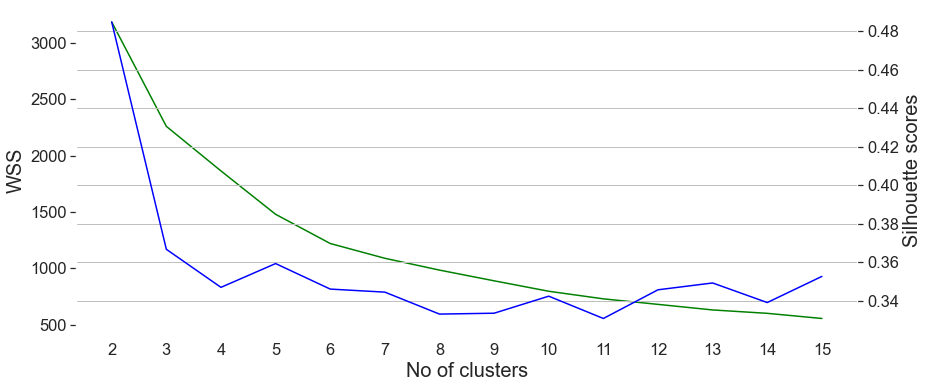

In [29]:
k=range(2,16)
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

In [30]:
km3=KMeans(n_clusters=3, random_state=1).fit(insurance_std)

In [31]:
insurance['cluster_3'] = km3.labels_

In [32]:
insurance.head(3)

,age,bmi,charges,log_charges,age_cat,bmi_cat,smoker_yes,cluster_3
0,19,27.90,16884.9240,9.734176,Young Adult,Overweight,1,0
1,18,33.77,1725.5523,7.453302,Young Adult,Obese,0,1
2,28,33.00,4449.4620,8.400538,Young Adult,Obese,0,1


In [33]:
silhouette_score(insurance_std, km3.labels_)

0.3667755446133224

In [34]:
colors = np.array(['red', 'green', 'blue', 'yellow'])

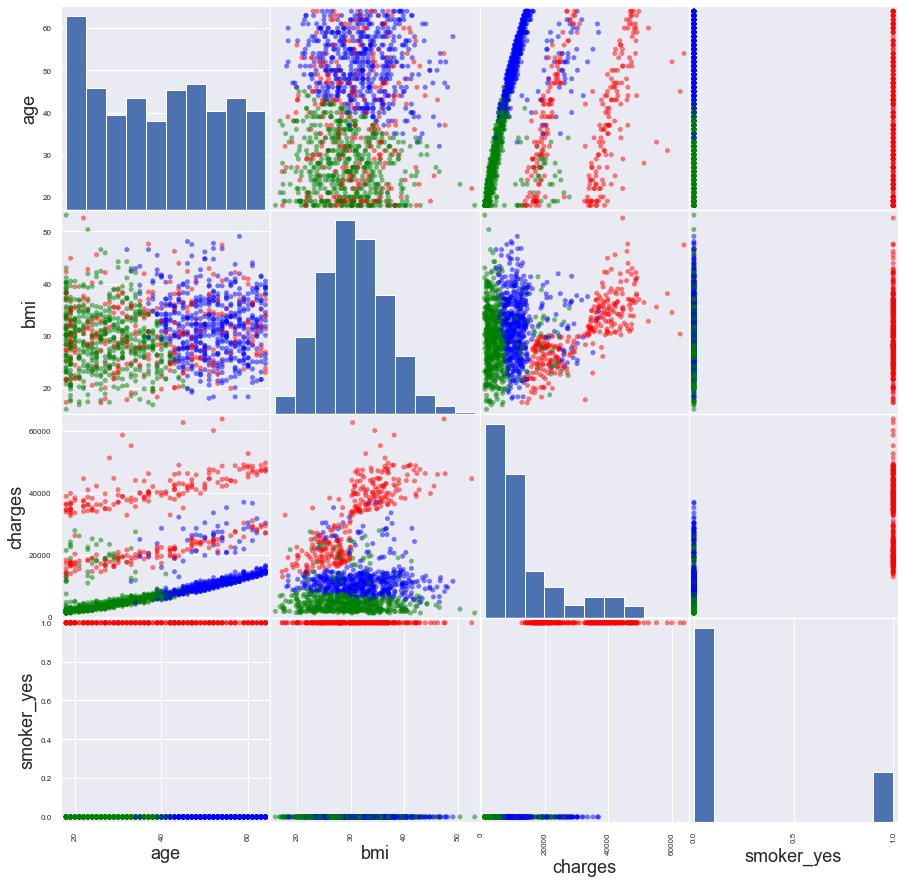

In [35]:
pd.plotting.scatter_matrix(insurance[['age', 'bmi', 'charges','smoker_yes']], c=colors[insurance.cluster_3], figsize=(15,15), s=100)
plt.show()

In [36]:
centers = insurance[[ 'bmi', 'charges','cluster_3']].groupby('cluster_3').mean()

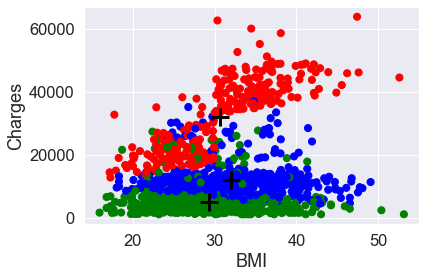

In [37]:
plt.figsize=(15,15)
plt.scatter(insurance.bmi, insurance.charges, c=colors[insurance.cluster_3], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.bmi, centers.charges, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

#### Kmean for BMI and Charges

In [38]:
ins_bmi_charges_std=insurance_std[:,[1,2]]
print(ins_bmi_charges_std.shape)
km_bmi_charges=km3.fit_predict(ins_bmi_charges_std)
print(km_bmi_charges.shape)

(1338, 2)
(1338,)


In [39]:
ins_bmi_charges=insurance.loc[:,['bmi','charges']]
ins_bmi_charges['bmi_charges_clusters']=km_bmi_charges
bmi_charges_centers = ins_bmi_charges.groupby('bmi_charges_clusters').mean()

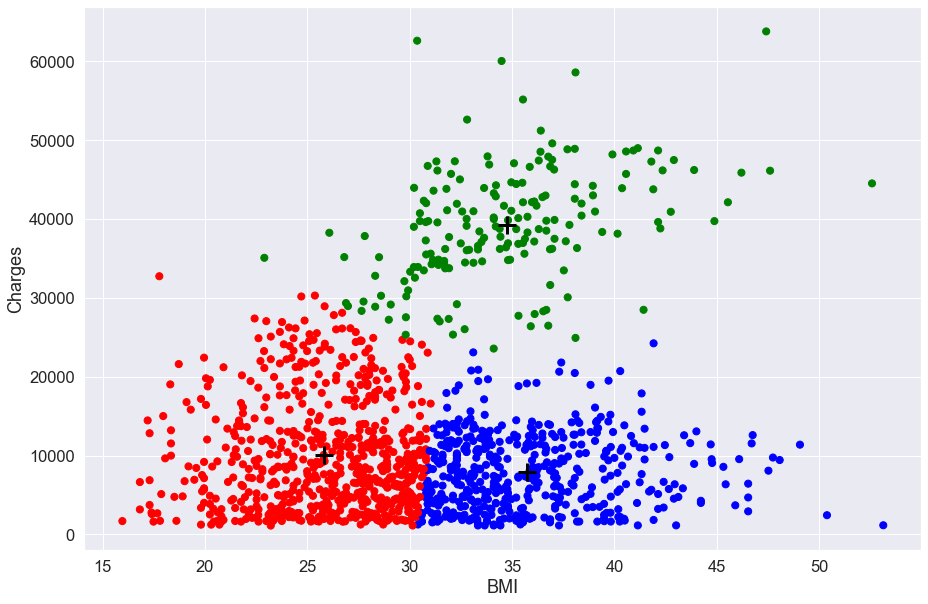

In [40]:
# scatter plot (0=red, 1=green, 2=blue)
plt.figure(figsize=[15,10])
plt.scatter(ins_bmi_charges.bmi, ins_bmi_charges.charges, c=colors[ins_bmi_charges.bmi_charges_clusters], s=50)

# cluster centers, marked by "+"
plt.scatter(bmi_charges_centers.bmi, bmi_charges_centers.charges, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [41]:
silhouette_score(ins_bmi_charges_std, km_bmi_charges)

0.444126600970325

#### Kmean for Age and Charges

In [42]:
ins_age_charges_std=insurance_std[:,[0,2]]
print(ins_age_charges_std.shape)
km_age_charges=km3.fit_predict(ins_age_charges_std)
print(km_age_charges.shape)

(1338, 2)
(1338,)


In [43]:
ins_age_charges=insurance.loc[:,['age','charges']]
ins_age_charges['age_charges_clusters']=km_age_charges
age_charges_centers = ins_age_charges.groupby('age_charges_clusters').mean()

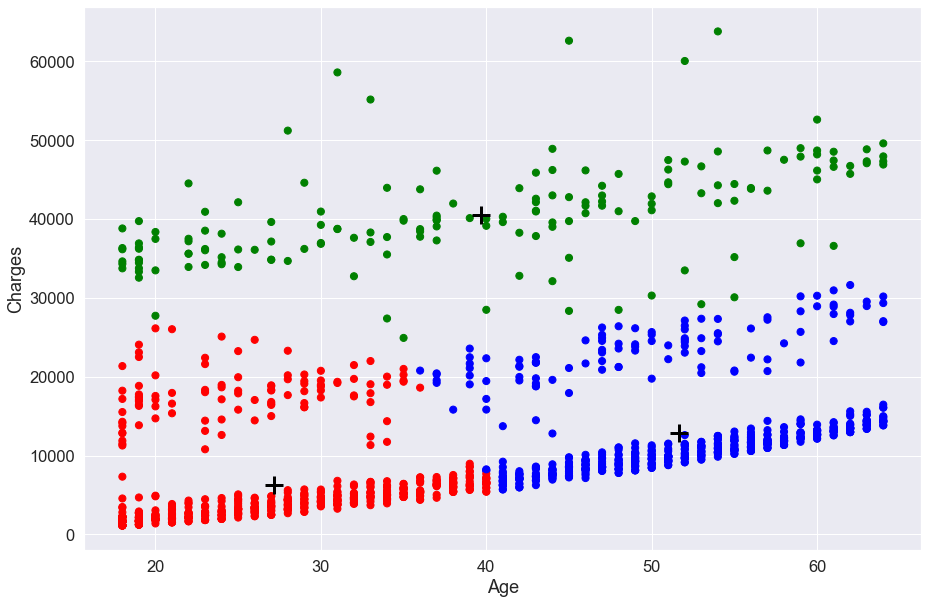

In [44]:
# scatter plot (0=red, 1=green, 2=blue)
plt.figure(figsize=(15,10))
plt.scatter(ins_age_charges.age, ins_age_charges.charges, c=colors[ins_age_charges.age_charges_clusters], s=50)

# cluster centers, marked by "+"
plt.scatter(age_charges_centers.age, age_charges_centers.charges, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [45]:
silhouette_score(ins_age_charges_std, km_age_charges)

0.523736426268398

## DBSCAN clustering

In [46]:
db = DBSCAN(eps=1, min_samples=3)
db.fit(insurance_std)

DBSCAN(eps=1, min_samples=3)

In [47]:
db.labels_

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [48]:
insurance['cluster'] = db.labels_
insurance.sort_values('cluster')

,age,bmi,charges,log_charges,age_cat,bmi_cat,smoker_yes,cluster_3,cluster
543,54,47.410,63770.42801,11.063045,Adult,Obese,1,0,-1
1047,22,52.580,44501.39820,10.703276,Young Adult,Obese,1,0,-1
128,32,17.765,32734.18630,10.396175,Adult,Underweight,1,0,-1
0,19,27.900,16884.92400,9.734176,Young Adult,Overweight,1,0,0
655,52,25.300,24667.41900,10.113239,Adult,Overweight,1,0,0
...,...,...,...,...,...,...,...,...,...
599,52,37.525,33471.97189,10.418464,Adult,Obese,0,2,1
598,43,32.600,7441.50100,8.914828,Adult,Obese,0,2,1
597,34,33.250,5594.84550,8.629601,Adult,Obese,0,1,1
603,64,39.050,16085.12750,9.685650,Seniors,Obese,0,2,1


In [49]:
insurance_db = insurance[['age', 'bmi', 'charges', 'smoker_yes','cluster']]
insurance_db.groupby('cluster').mean()

,age,bmi,charges,smoker_yes
cluster,,,,
-1,36.000000,39.251667,47002.004170,1
0,38.542435,30.613875,31884.714057,1
1,39.385338,30.651795,8434.268298,0


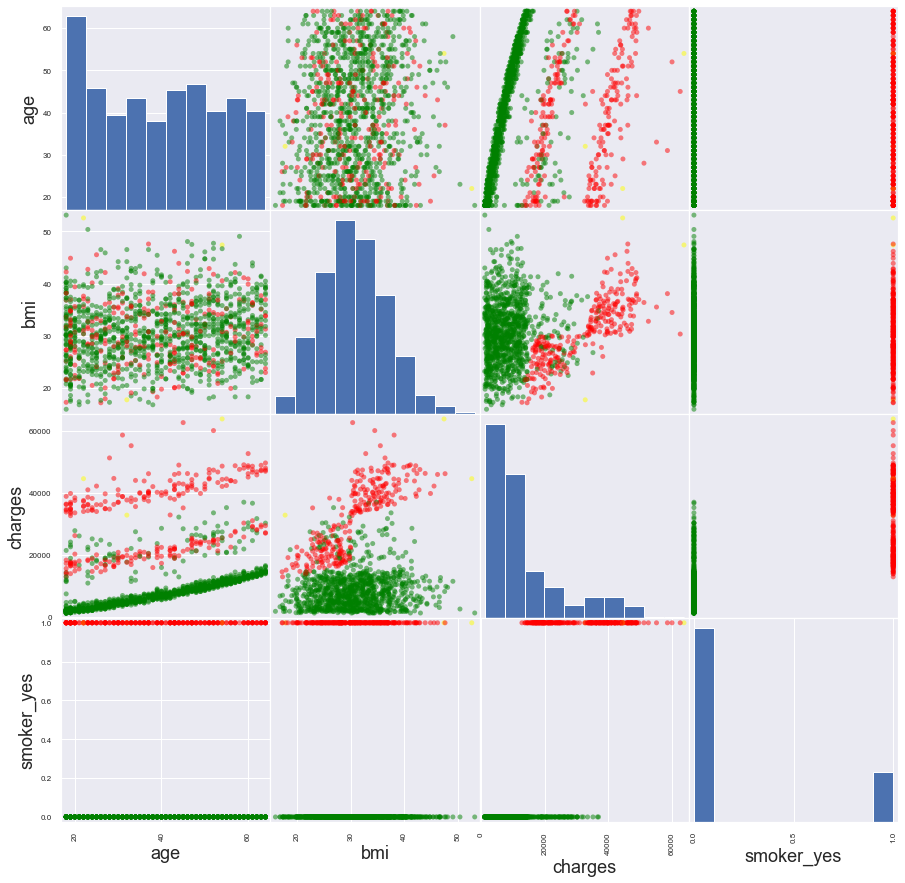

In [50]:
pd.plotting.scatter_matrix(insurance_db[['age', 'bmi', 'charges','smoker_yes']], c=colors[insurance_db.cluster], figsize=(15,15), s=100)
plt.show()

In [51]:
silhouette_score(insurance_std, db.labels_)

0.4644622529636633